# Imports

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [1]:
events = pd.read_csv("finalfinalfinal.csv")

NameError: name 'pd' is not defined

In [ ]:
df = pd.DataFrame(events).drop_duplicates()
df

,FIRSTNAME,EMAIL,SKILLS,EXPERIENCE,EVENTNAME,ACCEPTORREJECT,STARTTIME,ENDTIME
0,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:38:00,11:56:00
1,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:02:00,18:07:00
2,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:54:00,11:15:00
3,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:50:00,12:33:00
4,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:27:00,13:38:00
...,...,...,...,...,...,...,...,...
14149,Tallie,amayfield3y@prweb.com,NaN,18,Python,1,09:53:00,03:19:00
14150,Tallie,amayfield3y@prweb.com,NaN,18,Python,1,09:40:00,01:53:00
14151,Tallie,amayfield3y@prweb.com,NaN,18,Python,1,10:48:00,13:57:00
14152,Tallie,amayfield3y@prweb.com,NaN,18,Python,1,10:51:00,17:38:00


In [129]:
df.shape

(4565, 8)

In [130]:
df.isnull().sum()

FIRSTNAME            0
EMAIL                0
SKILLS            2398
EXPERIENCE           0
EVENTNAME            0
ACCEPTORREJECT       0
STARTTIME            0
ENDTIME              0
dtype: int64

In [131]:
df = df.dropna()

df

,FIRSTNAME,EMAIL,SKILLS,EXPERIENCE,EVENTNAME,ACCEPTORREJECT,STARTTIME,ENDTIME
0,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:38:00,11:56:00
1,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:02:00,18:07:00
2,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:54:00,11:15:00
3,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:50:00,12:33:00
4,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,10:27:00,13:38:00
...,...,...,...,...,...,...,...,...
6574,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,10:01:00,13:37:00
6575,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,10:58:00,03:51:00
6576,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,09:44:00,14:03:00
6577,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,10:32:00,06:12:00


# Univaiant Analysis

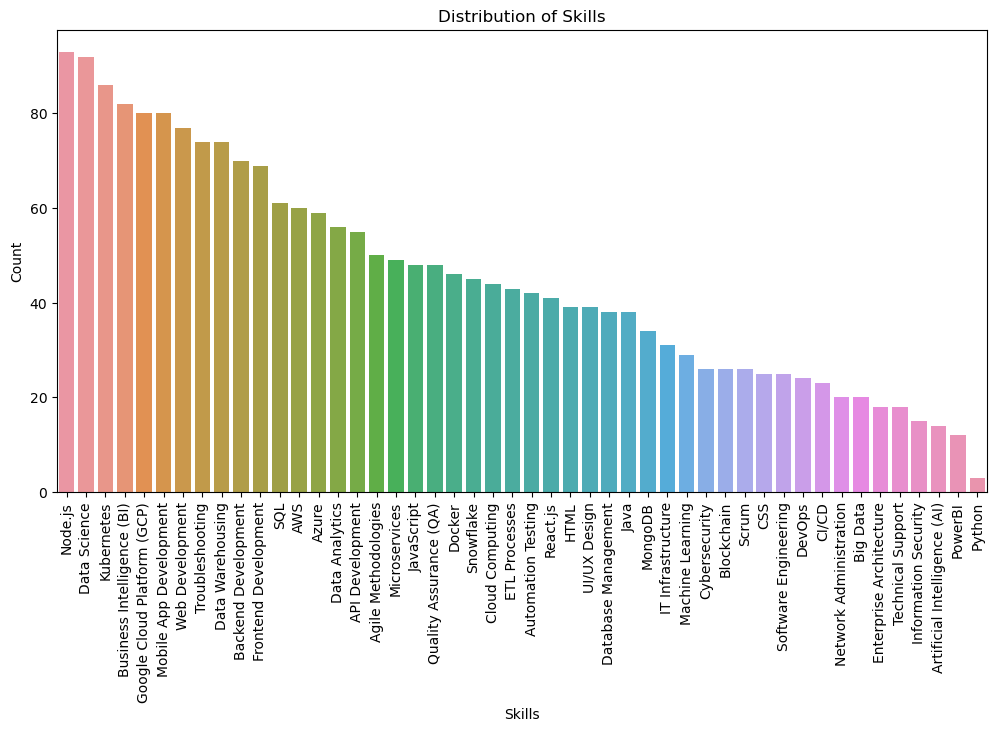

In [132]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='SKILLS', order=df['SKILLS'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

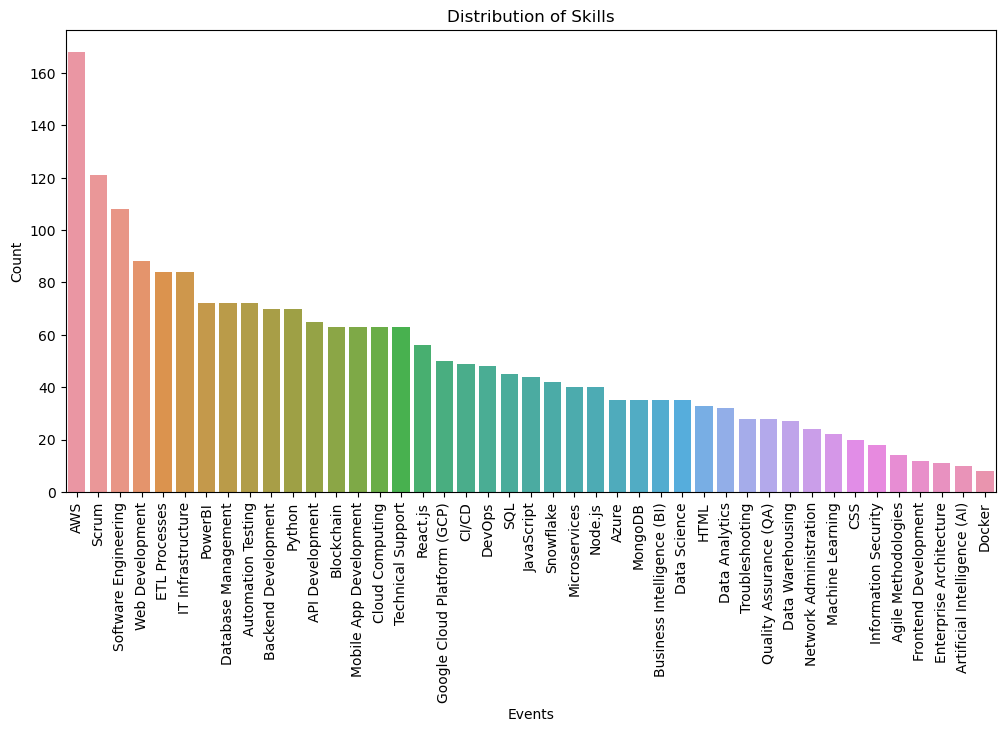

In [135]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EVENTNAME', order=df['EVENTNAME'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Skills')
plt.xlabel('Events')
plt.ylabel('Count')
plt.show()

C:\Users\JeffrinGoldwinRC\AppData\Local\Temp\ipykernel_7384\2183961417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])


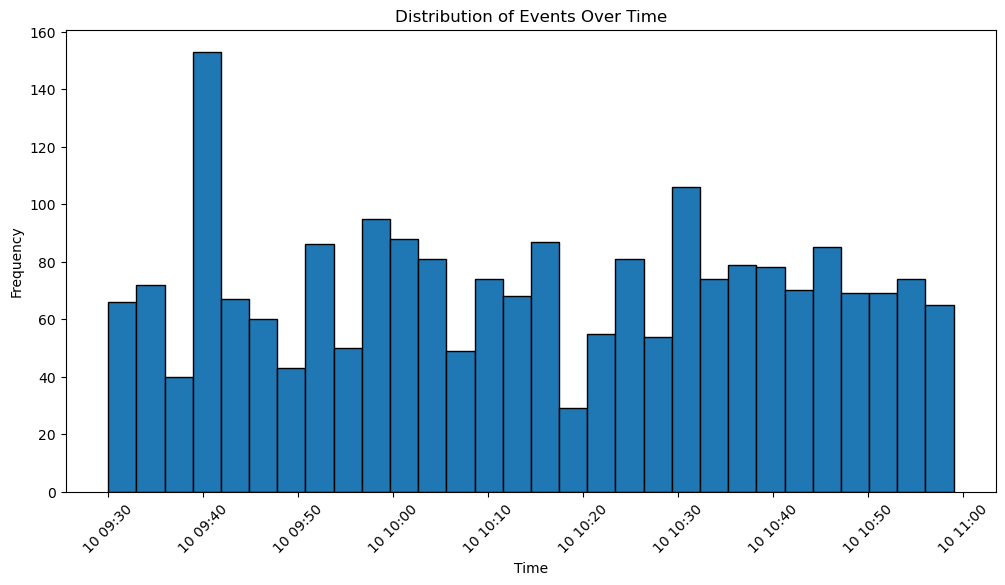

In [144]:
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])

# Plot the distribution of events over time
plt.figure(figsize=(12, 6))
plt.hist(df['STARTTIME'], bins=30, edgecolor='black')
plt.title('Distribution of Events Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Multivariant Analysis

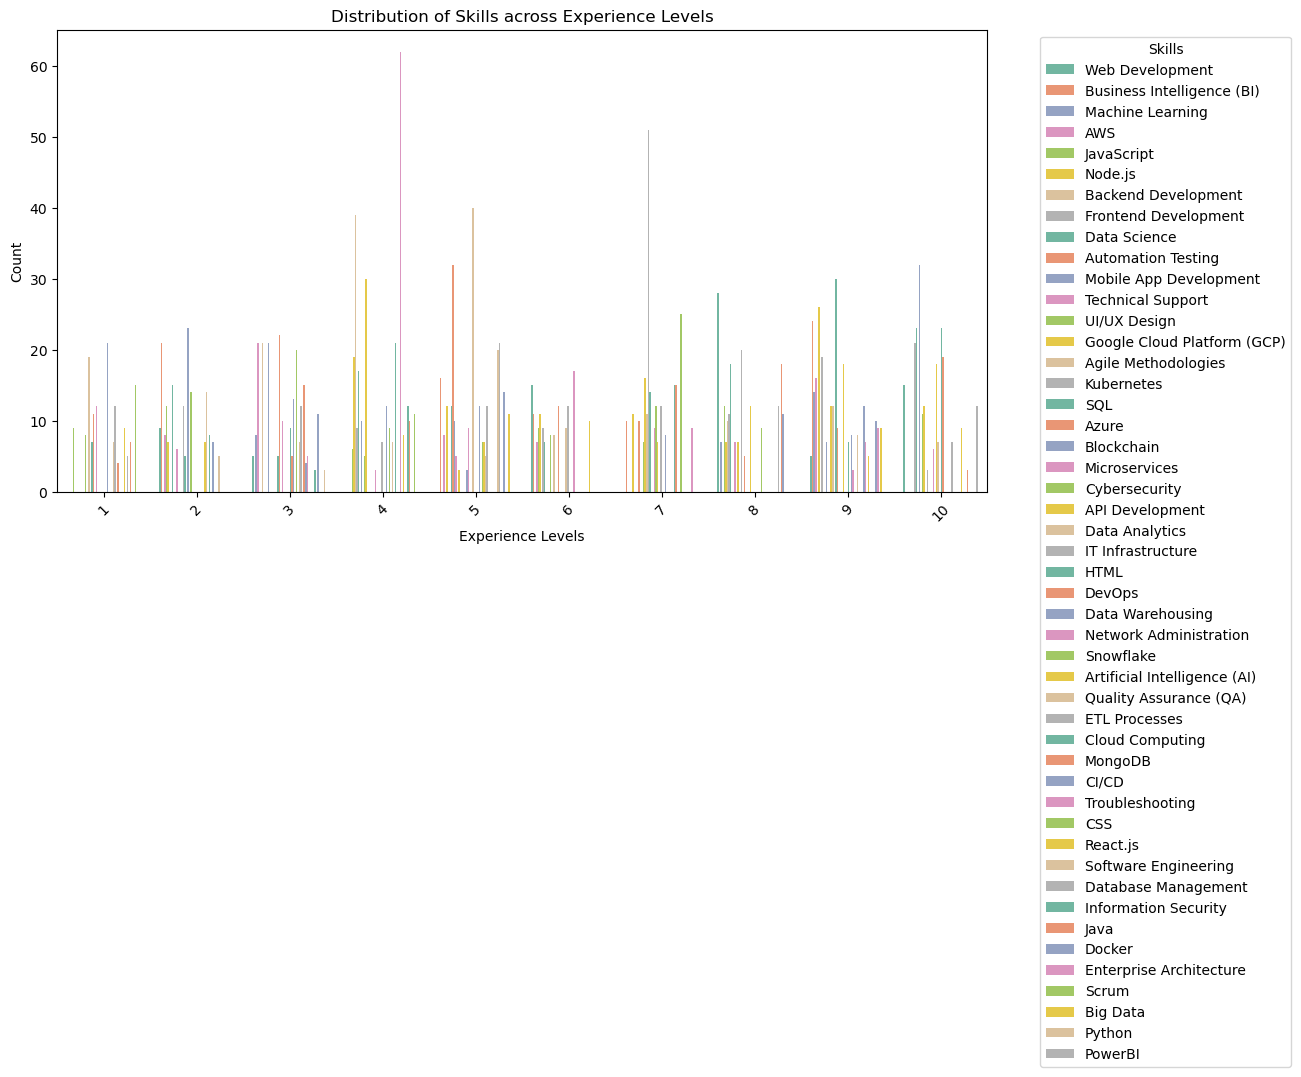

In [142]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='EXPERIENCE', hue='SKILLS', palette='Set2')
plt.title('Distribution of Skills across Experience Levels')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

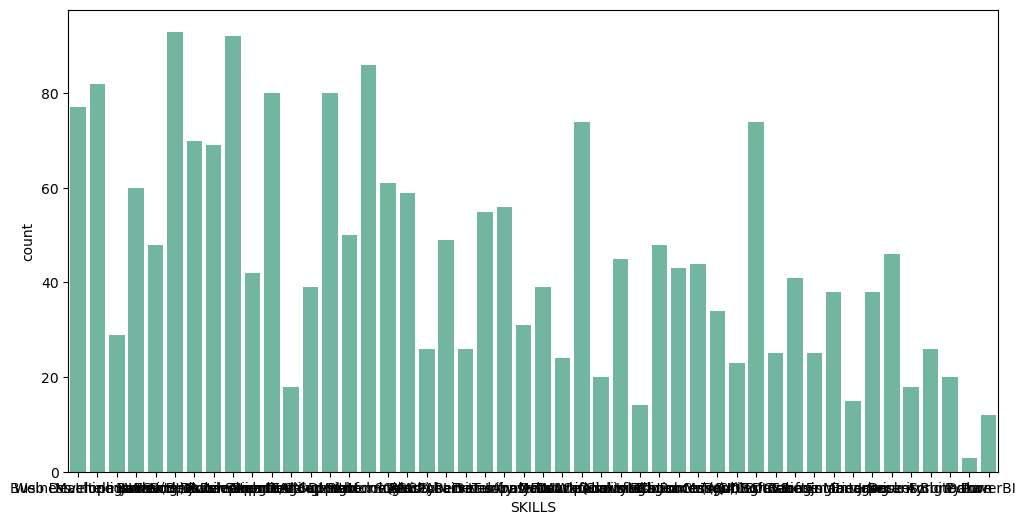

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame named 'df'
# and contains columns 'SKILLS' and 'ACCEPTORREJECT'

# Load your dataset
# df = pd.read_csv("your_dataset.csv")

# Plot the relationship between skills and acceptance/rejection rates
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='SKILLS', hue='ACCEPTORREJECT', palette='Set2')
plt.title('Relationship between Skills and Acceptance/Rejection Rates')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.legend(title='Accept/Reject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()


# Multivariate Analysis

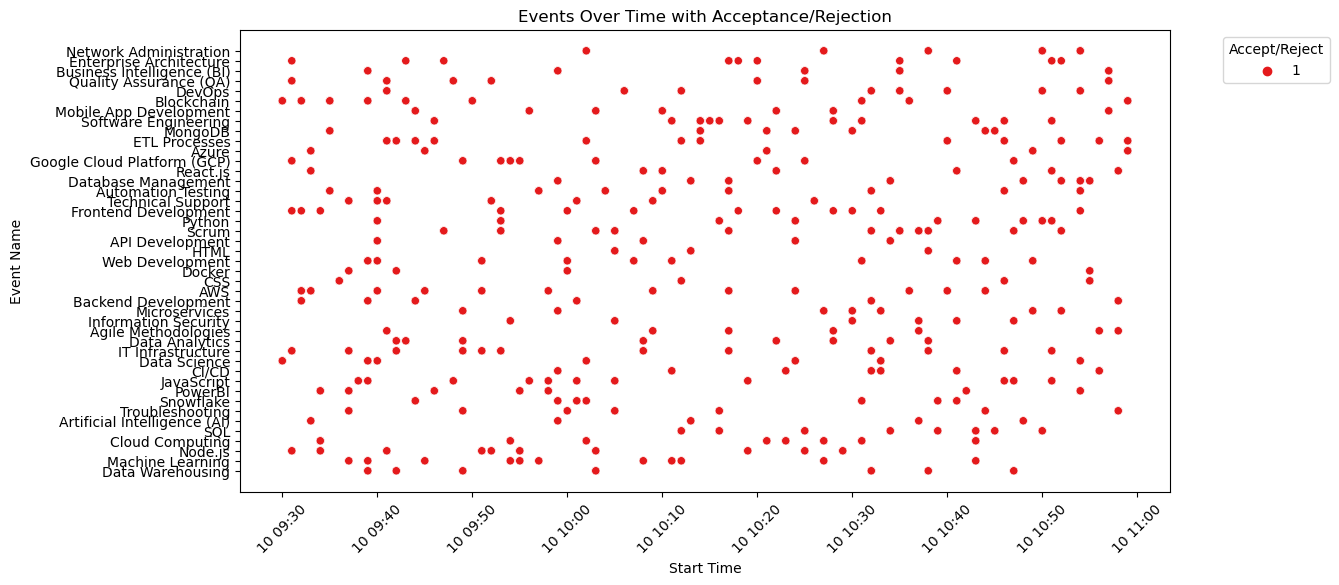

In [150]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='STARTTIME', y='EVENTNAME', hue='ACCEPTORREJECT', palette='Set1')
plt.title('Events Over Time with Acceptance/Rejection')
plt.xlabel('Start Time')
plt.ylabel('Event Name')
plt.legend(title='Accept/Reject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [133]:
df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])
df['ENDTIME'] = pd.to_datetime(df['ENDTIME'])

# Calculate the duration in hours
df['HOURS'] = (df['ENDTIME'] - df['STARTTIME']).dt.total_seconds() / 3600

print(df)

     FIRSTNAME                       EMAIL                SKILLS  EXPERIENCE  \
0         Alex  eworsley6e@dailymail.co.uk       Web Development          10   
1         Alex  eworsley6e@dailymail.co.uk       Web Development          10   
2         Alex  eworsley6e@dailymail.co.uk       Web Development          10   
3         Alex  eworsley6e@dailymail.co.uk       Web Development          10   
4         Alex  eworsley6e@dailymail.co.uk       Web Development          10   
...        ...                         ...                   ...         ...   
6574    Margot  mranyardha@cyberchimps.com  Information Security           4   
6575    Margot  mranyardha@cyberchimps.com  Information Security           4   
6576    Margot  mranyardha@cyberchimps.com  Information Security           4   
6577    Margot  mranyardha@cyberchimps.com  Information Security           4   
6578    Margot  mranyardha@cyberchimps.com  Information Security           4   

                   EVENTNAME  ACCEPTORR

C:\Users\JeffrinGoldwinRC\AppData\Local\Temp\ipykernel_7384\896145740.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])
C:\Users\JeffrinGoldwinRC\AppData\Local\Temp\ipykernel_7384\896145740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STARTTIME'] = pd.to_datetime(df['STARTTIME'])
C:\Users\JeffrinGoldwinRC\AppData\Local\Temp\ipykernel_7384\896145740.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ENDTIM

In [121]:
df

,FIRSTNAME,EMAIL,SKILLS,EXPERIENCE,EVENTNAME,ACCEPTORREJECT,STARTTIME,ENDTIME,HOURS
0,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,2024-04-10 10:38:00,2024-04-10 11:56:00,1.300000
1,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,2024-04-10 10:02:00,2024-04-10 18:07:00,8.083333
2,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,2024-04-10 10:54:00,2024-04-10 11:15:00,0.350000
3,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,2024-04-10 10:50:00,2024-04-10 12:33:00,1.716667
4,Alex,eworsley6e@dailymail.co.uk,Web Development,10,Network Administration,1,2024-04-10 10:27:00,2024-04-10 13:38:00,3.183333
...,...,...,...,...,...,...,...,...,...
6574,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,2024-04-10 10:01:00,2024-04-10 13:37:00,3.600000
6575,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,2024-04-10 10:58:00,2024-04-10 03:51:00,-7.116667
6576,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,2024-04-10 09:44:00,2024-04-10 14:03:00,4.316667
6577,Margot,mranyardha@cyberchimps.com,Information Security,4,Backend Development,1,2024-04-10 10:32:00,2024-04-10 06:12:00,-4.333333


In [122]:
df.dtypes

FIRSTNAME                 object
EMAIL                     object
SKILLS                    object
EXPERIENCE                 int64
EVENTNAME                 object
ACCEPTORREJECT             int64
STARTTIME         datetime64[ns]
ENDTIME           datetime64[ns]
HOURS                    float64
dtype: object

In [123]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column dtype is 'category' or 'object'
    if df[col].dtype in ['category', 'object']:
        # Fit label encoder and transform values for the column
        df[col] = label_encoder.fit_transform(df[col])

print(df)


      FIRSTNAME  EMAIL  SKILLS  EXPERIENCE  EVENTNAME  ACCEPTORREJECT  \
0             4     54      47          10         30               1   
1             4     54      47          10         30               1   
2             4     54      47          10         30               1   
3             4     54      47          10         30               1   
4             4     54      47          10         30               1   
...         ...    ...     ...         ...        ...             ...   
6574        146    108      26           4          6               1   
6575        146    108      26           4          6               1   
6576        146    108      26           4          6               1   
6577        146    108      26           4          6               1   
6578        146    108      26           4          6               1   

               STARTTIME             ENDTIME     HOURS  
0    2024-04-10 10:38:00 2024-04-10 11:56:00  1.300000  
1    2024

C:\Users\JeffrinGoldwinRC\AppData\Local\Temp\ipykernel_7384\1364264067.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\JeffrinGoldwinRC\AppData\Local\Temp\ipykernel_7384\1364264067.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\JeffrinGoldwinRC\AppData\Local\Temp\ipykernel_7384\1364264067.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [124]:
X = df.drop(columns=['EVENTNAME', 'STARTTIME', 'ENDTIME', 'FIRSTNAME', 'EMAIL'], axis=1)
y = df['EVENTNAME']

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [2167, 4565]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_rep)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluation metrics for KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Print evaluation metrics for KNN classifier
print("KNN Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)
print("\nClassification Report:\n", classification_rep_knn)


In [134]:
#Final

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')

# Calculate recall
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Calculate F1 score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Generate classification report
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print all evaluation metrics
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1 Score:", f1_dt)
print("\nClassification Report for Decision Tree:\n", classification_rep_dt)



Decision Tree Accuracy: 0.8532311062431545
Decision Tree Precision: 0.8612310083256156
Decision Tree Recall: 0.8532311062431545
Decision Tree F1 Score: 0.8540887704687039

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.94      0.86      0.90        51
           2       0.67      0.77      0.71        13
           3       1.00      1.00      1.00         2
           4       0.83      0.79      0.81        19
           5       0.79      0.85      0.81        13
           6       0.78      0.95      0.86        22
           7       0.96      0.93      0.95        29
           8       0.71      0.50      0.59        10
           9       0.68      0.81      0.74        16
          10       0.90      1.00      0.95         9
          11       0.96      0.96      0.96        25
          12       0.94      0.88      0.91        17
          13       0.86      